In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

In [149]:
# prepare the cities dataframe

cities_df = pd.DataFrame({ 
    "City": cities
     
    })
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,,,,,,,,
1,eldikan,,,,,,,,
2,busselton,,,,,,,,
3,kralendijk,,,,,,,,
4,bambous virieux,,,,,,,,


In [151]:
# Define URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
data_rows = len(cities_df)
for index, row in cities_df.iterrows():
    print(index)
    city = row['City']
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record {index} of {data_rows} | {city}")
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max'] # we will want to modify to bring back in not Kelvin
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] =response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Lat'] =response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
            
        print("------------")
    
    time.sleep(1)


0
Processing Record 0 of 620 | kapaa
1
Processing Record 1 of 620 | eldikan
Missing field/result... skipping.
------------
2
Processing Record 2 of 620 | busselton
3
Processing Record 3 of 620 | kralendijk
4
Processing Record 4 of 620 | bambous virieux
5
Processing Record 5 of 620 | harrison
6
Processing Record 6 of 620 | saleaula
Missing field/result... skipping.
------------
7
Processing Record 7 of 620 | lebu
8
Processing Record 8 of 620 | bluff
9
Processing Record 9 of 620 | broome
10
Processing Record 10 of 620 | rock springs
11
Processing Record 11 of 620 | constitucion
12
Processing Record 12 of 620 | wenling
13
Processing Record 13 of 620 | alofi
14
Processing Record 14 of 620 | faanui
15
Processing Record 15 of 620 | mahebourg
16
Processing Record 16 of 620 | kaitangata
17
Processing Record 17 of 620 | acarau
18
Processing Record 18 of 620 | airai
19
Processing Record 19 of 620 | chuy
20
Processing Record 20 of 620 | attawapiskat
Missing field/result... skipping.
------------


174
Processing Record 174 of 620 | menemen
175
Processing Record 175 of 620 | santiago del estero
176
Processing Record 176 of 620 | zhaodong
177
Processing Record 177 of 620 | geraldton
178
Processing Record 178 of 620 | saldanha
179
Processing Record 179 of 620 | torbat-e jam
180
Processing Record 180 of 620 | burla
181
Processing Record 181 of 620 | makhachkala
182
Processing Record 182 of 620 | catia la mar
183
Processing Record 183 of 620 | yerbogachen
184
Processing Record 184 of 620 | broken hill
185
Processing Record 185 of 620 | nambucca heads
186
Processing Record 186 of 620 | bolshaya sosnova
187
Processing Record 187 of 620 | nikolskoye
188
Processing Record 188 of 620 | mys shmidta
Missing field/result... skipping.
------------
189
Processing Record 189 of 620 | hualmay
190
Processing Record 190 of 620 | husavik
191
Processing Record 191 of 620 | ulladulla
192
Processing Record 192 of 620 | kuopio
193
Processing Record 193 of 620 | jiuquan
194
Processing Record 194 of 620 

344
Processing Record 344 of 620 | port lincoln
345
Processing Record 345 of 620 | assiniboia
346
Processing Record 346 of 620 | oranjemund
347
Processing Record 347 of 620 | biak
348
Processing Record 348 of 620 | hov
349
Processing Record 349 of 620 | cayenne
350
Processing Record 350 of 620 | tefe
351
Processing Record 351 of 620 | conceicao da barra
352
Processing Record 352 of 620 | tucuman
353
Processing Record 353 of 620 | bara
354
Processing Record 354 of 620 | canon city
355
Processing Record 355 of 620 | umzimvubu
Missing field/result... skipping.
------------
356
Processing Record 356 of 620 | estevan
357
Processing Record 357 of 620 | hami
358
Processing Record 358 of 620 | pajapan
359
Processing Record 359 of 620 | okhotsk
360
Processing Record 360 of 620 | bathurst
361
Processing Record 361 of 620 | wyndham
362
Processing Record 362 of 620 | shubarkuduk
363
Processing Record 363 of 620 | port hedland
364
Processing Record 364 of 620 | masallatah
365
Processing Record 365 

Processing Record 518 of 620 | verin
519
Processing Record 519 of 620 | mweka
520
Processing Record 520 of 620 | rajapur
521
Processing Record 521 of 620 | khonuu
Missing field/result... skipping.
------------
522
Processing Record 522 of 620 | eyl
523
Processing Record 523 of 620 | show low
524
Processing Record 524 of 620 | mahanoro
525
Processing Record 525 of 620 | sur
526
Processing Record 526 of 620 | nemuro
527
Processing Record 527 of 620 | novyy urengoy
528
Processing Record 528 of 620 | boatlaname
Missing field/result... skipping.
------------
529
Processing Record 529 of 620 | tari
530
Processing Record 530 of 620 | jijiga
531
Processing Record 531 of 620 | jequitinhonha
532
Processing Record 532 of 620 | whitley bay
533
Processing Record 533 of 620 | cockburn town
534
Processing Record 534 of 620 | tautira
535
Processing Record 535 of 620 | srednekolymsk
536
Processing Record 536 of 620 | albacete
537
Processing Record 537 of 620 | binzhou
538
Processing Record 538 of 620 |

In [205]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.075199,-159.319,84.519997,77.0,75.0,1.99,,
1,eldikan,,,,,,,,
2,busselton,-33.650002,115.333298,54.049999,64.0,77.0,21.809999,,
3,kralendijk,12.15,-68.266701,80.580002,78.0,91.0,13.8,,
4,bambous virieux,-20.3428,57.7575,66.220001,88.0,20.0,3.44,,


In [150]:
#print(json.dumps(response, sort_keys=True, indent=4))

{
    "base": "stations",
    "clouds": {
        "all": 64
    },
    "cod": 200,
    "coord": {
        "lat": -20.1,
        "lon": 146.2667
    },
    "dt": 1626311850,
    "id": 2171722,
    "main": {
        "feels_like": 77.25,
        "grnd_level": 979,
        "humidity": 60,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 77.04,
        "temp_max": 77.04,
        "temp_min": 77.04
    },
    "name": "Charters Towers",
    "sys": {
        "country": "AU",
        "sunrise": 1626295804,
        "sunset": 1626335475
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 1,
        "gust": 13.35,
        "speed": 11.74
    }
}


In [206]:
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"], downcast="float")
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"], downcast="float")
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"], downcast="float")
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"], downcast="float")
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"], downcast="float")
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"], downcast="float")

In [207]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.075199,-159.319000,84.519997,77.0,75.0,1.990000,,
1,eldikan,NaN,NaN,NaN,NaN,NaN,NaN,,
2,busselton,-33.650002,115.333298,54.049999,64.0,77.0,21.809999,,
3,kralendijk,12.150000,-68.266701,80.580002,78.0,91.0,13.800000,,
4,bambous virieux,-20.342800,57.757500,66.220001,88.0,20.0,3.440000,,


In [208]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,20.595457,18.543657,69.362633,71.513939,55.543552,7.620456
std,33.132763,89.613319,13.334270,18.996069,40.996880,5.703737
min,-54.799999,-175.199997,28.059999,6.000000,0.000000,0.000000
25%,-6.135275,-63.880573,60.040001,61.000000,7.250000,3.440000
50%,25.897251,25.051399,70.834999,76.000000,70.000000,6.185000
75%,48.151901,94.891052,80.035004,86.000000,99.000000,10.360000
max,78.218597,178.416702,100.870003,100.000000,100.000000,33.380001


In [191]:
# get where humidity is > 100
index = cities_df.index
condition =  cities_df["Humidity"] > 100
humid_indices = index[condition]
humid_indices_list = humid_indices.tolist()
print(humid_indices_list)

[]


In [194]:
##This still isn't working; something goes off with the datatypes after running thsi

if len(humid_indices_list) > 0:
        cities_df["Humidity"] = cities_df["Humidity"].replace([humid_indices_list],'NaN')
        clean_city_df= cities_df.fillna('', inplace=True)
    else:
        clean_city_df= cities_df.fillna('', inplace=True)
    
clean_city_df

In [204]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.075199,-159.319,84.519997,77.0,75.0,1.99,,
1,eldikan,,,,,,,,
2,busselton,-33.650002,115.333298,54.049999,64.0,77.0,21.809999,,
3,kralendijk,12.15,-68.266701,80.580002,78.0,91.0,13.8,,
4,bambous virieux,-20.3428,57.7575,66.220001,88.0,20.0,3.44,,


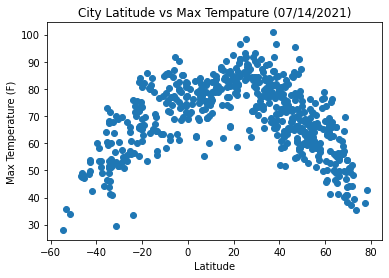

In [211]:
maxtemp = cities_df['Max Temp']
Lat = cities_df['Lat']
plt.scatter(Lat, maxtemp)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Max Tempature (07/14/2021)')
plt.show()

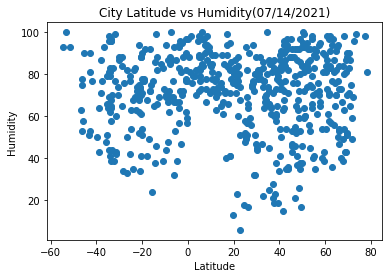

In [212]:
humidity = cities_df['Humidity']
plt.scatter(Lat, humidity)
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City Latitude vs Humidity(07/14/2021)')
plt.show()

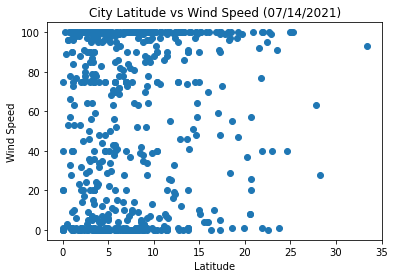

In [216]:
ws= cities_df['Wind Speed']
plt.scatter(ws, cloud)
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('City Latitude vs Wind Speed (07/14/2021)')
plt.show()

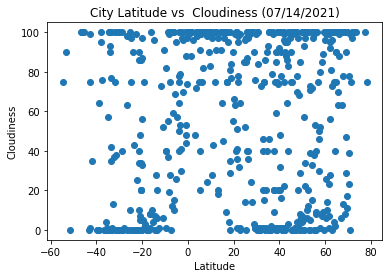

In [217]:
cloud= cities_df['Cloudiness']
plt.scatter(Lat, cloud)
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('City Latitude vs  Cloudiness (07/14/2021)')
plt.show()

# Linear Regression

In [222]:
cities_Northern_df= cities_df[cities_df['Lat'] > 0]
cities_Southern_df= cities_df[cities_df['Lat'] < 0]

Northern Hemisphere - Max Temp vs Latitude Linear Regression

The linear regression is: y = -0.43x + 87.97
The r-squared is: 0.4309


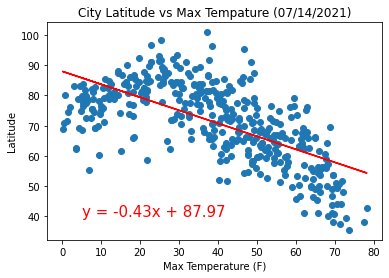

In [247]:
maxtemp = cities_Northern_df['Max Temp']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, maxtemp)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat, maxtemp)
plt.plot(Lat,regress_values,"r-")


plt.ylabel('Latitude')
plt.xlabel('Max Temperature (F)')
plt.title('City Latitude vs Max Tempature (07/14/2021)')
plt.annotate(line_eq,(5,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression is: y = 0.76x + 81.46
The r-squared is: 0.5953


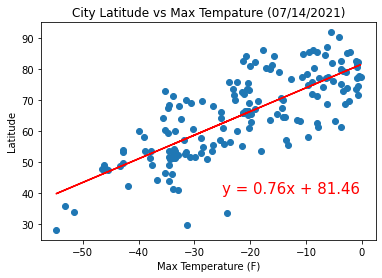

In [252]:
maxtemp = cities_Southern_df['Max Temp']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, maxtemp)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat, maxtemp)
plt.plot(Lat,regress_values,"r-")


plt.ylabel('Latitude')
plt.xlabel('Max Temperature (F)')
plt.title('City Latitude vs Max Tempature (07/14/2021)')
plt.annotate(line_eq,(-25,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.show()

 Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression is: y = 0.06x + 71.96
The r-squared is: 0.0023


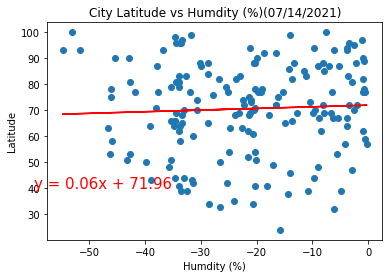

In [255]:
humidity = cities_Southern_df['Humidity']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, humidity)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,humidity)
plt.plot(Lat,regress_values,"r-")


plt.ylabel('Latitude')
plt.xlabel('Humdity (%)')
plt.title('City Latitude vs Humdity (%)(07/14/2021)')
plt.annotate(line_eq,(-60,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.show()

 Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression is: y = -0.1x + 75.66
The r-squared is: 0.0094


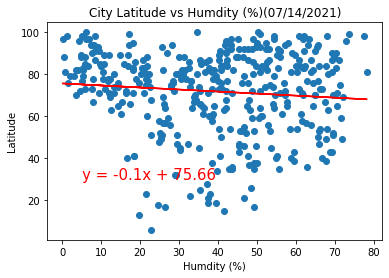

In [257]:
humidity = cities_Northern_df['Humidity']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, humidity)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,humidity)
plt.plot(Lat,regress_values,"r-")


plt.ylabel('Latitude')
plt.xlabel('Humdity (%)')
plt.title('City Latitude vs Humdity (%)(07/14/2021)')
plt.annotate(line_eq,(5,30),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression is: y = -0.32x + 72.28
The r-squared is: 0.0241


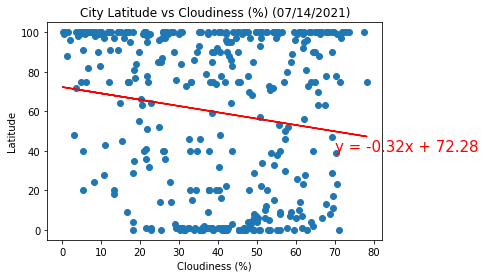

In [261]:
cloudiness = cities_Northern_df['Cloudiness']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, cloudiness)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,cloudiness)
plt.plot(Lat,regress_values,"r-")


plt.ylabel('Latitude')
plt.xlabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%) (07/14/2021)')
plt.annotate(line_eq,(70,40),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0094


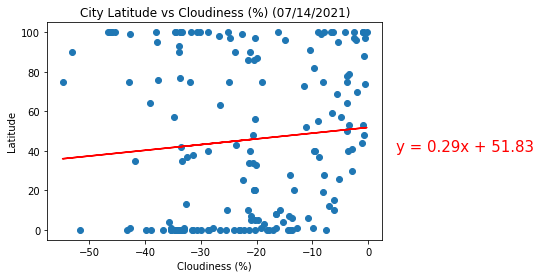

In [262]:
cloudiness = cities_Southern_df['Cloudiness']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, cloudiness)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,cloudiness)
plt.plot(Lat,regress_values,"r-")


plt.ylabel('Latitude')
plt.xlabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%) (07/14/2021)')
plt.annotate(line_eq,(5,40),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0033


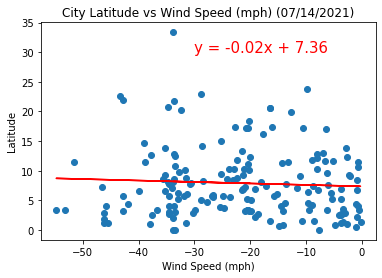

In [267]:
windspeed = cities_Southern_df['Wind Speed']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, windspeed)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,windspeed)
plt.plot(Lat,regress_values,"r-")


plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph) (07/14/2021)')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.show()